# Looking at Language

Insights into how language is represented in the film industry.

## import the data

In [100]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [6]:
#changing the display settings in dataframes to only format floats and display columns

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 100)

In [7]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\rt.movie_info.csv.gz',
 './zippedData\\rt.reviews.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [8]:
# cleaning the filenames

csv_files_dict = {} #create a dictionary of datasets
for filename in csv_files: #create a for loop to batch clean files
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") #remove .csv file extensions
    filename_df = pd.read_csv(filename, index_col=0, encoding='utf-8') 
    csv_files_dict[filename_cleaned] = filename_df #load .csv file as dataframe using col 1 as index and encode in utf-8 and save as the cleaned filename

In [9]:
print(datafiles_dict.keys()) #print dictionary keys

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets'])


In [21]:
tmdb_lang_df = pd.read_csv('tmdb_lang.csv')#load in dataset in csv to dataframe
tmdb_mglb_df = pd.read_csv('tmdb_mglb.csv') #load in dataset in csv to dataframe
tmdb_mglb_df = tmdb_mglb_df.drop(['Unnamed: 0', 'movie', 'title'], axis=1) #drop columns

tmdb_mglb_df.head() #call first 5 rows

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,nan,nan,nan,nan,nan
1,10191,How to Train Your Dragon,28.73,2010-03-26,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,10138,Iron Man 2,28.52,2010-05-07,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,862,Toy Story,28.00,1995-11-22,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,27205,Inception,27.92,2010-07-16,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


In [11]:
tmdb_mglb_df_clean = tmdb_mglb_df.dropna() #drop NaN values
tmdb_mglb_df_clean = tmdb_mglb_df_clean.drop_duplicates(subset='original_title', keep='first') #drop duplicates in column and keep the first one

In [83]:
tmdb_mglb_df_clean.describe() #return summary statistics of dataframe

,id,popularity,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
count,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00
mean,192990.67,10.72,6.16,1657.41,0.09,0.45,0.03,0.07,0.30,0.12,0.10,0.02,0.03,0.07,0.01,0.24,0.13,0.27,0.01,0.16,0.04,0.11,0.14,38702249.58,48868373.85,120136598.84,10166124.28,81434349.26
std,140321.57,7.99,1.14,2631.85,0.29,0.50,0.16,0.26,0.46,0.32,0.30,0.16,0.18,0.25,0.11,0.43,0.33,0.45,0.07,0.36,0.19,0.32,0.34,52246717.32,81100786.38,223570295.58,55716282.47,184409505.69
min,62.00,0.60,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9000.00,0.00,0.00,-201941321.00,-110450242.00
25%,64139.50,5.97,5.60,77.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5000000.00,830829.00,3168816.25,-10000000.00,-1743918.75
50%,164371.50,9.52,6.20,618.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20000000.00,20256140.50,36481606.00,-785468.50,13531611.00
75%,307753.25,14.34,6.90,2036.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,50000000.00,58452849.75,126609553.25,17937046.00,77570874.75
max,566114.00,80.77,10.00,22186.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,425000000.00,760507625.00,2776345279.00,500059566.00,2351345279.00


In [14]:
#set new dataframe with selected columns

lang_df = tmdb_mglb_df_clean.loc[:, ['original_title', 'original_language', 'release_date_x', 'production_budget', 'domestic_gross', 'worldwide_gross', 'total_net']]
lang_df

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
1,How to Train Your Dragon,English,2010-03-26,165000000.00,217581232.00,494870992.00,329870992.00
2,Iron Man 2,English,2010-05-07,170000000.00,312433331.00,621156389.00,451156389.00
3,Toy Story,English,1995-11-22,30000000.00,191796233.00,364545516.00,334545516.00
4,Inception,English,2010-07-16,160000000.00,292576195.00,835524642.00,675524642.00
5,Percy Jackson & the Olympians: The Lightning T...,English,2010-02-11,95000000.00,88768303.00,223050874.00,128050874.00
...,...,...,...,...,...,...,...
25905,Molly,English,2018-09-25,21000000.00,17396.00,17396.00,-20982604.00
26120,The Box,English,2018-03-04,25000000.00,15051977.00,34356760.00,9356760.00
26172,Enough,English,2018-03-22,38000000.00,39177215.00,50970660.00,12970660.00
26402,Undiscovered,English,2018-04-07,9000000.00,1069318.00,1069318.00,-7930682.00


In [16]:
#filter out 'English' value in 'original_language' col

langne_df = lang_df[~lang_df['original_language'].isin(['English'])] 
langne_df

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
73,El secreto de sus ojos,Spanish,2010-04-16,3500000.00,6391436.00,40527719.00,37027719.00
173,Konferenz der Tiere,German,2010-10-07,30000000.00,0.00,53048539.00,23048539.00
186,Incendies,French,2010-09-04,6800000.00,6857096.00,16038343.00,9238343.00
222,L'illusionniste,French,2010-12-25,17000000.00,2231474.00,8609949.00,-8390051.00
272,Biutiful,Spanish,2010-12-28,35000000.00,5101237.00,24687524.00,-10312476.00
386,Kites,Hindi,2010-05-21,9200000.00,1685269.00,17155193.00,7955193.00
2407,Trash,Spanish,2010-11-03,12000000.00,17484.00,6553186.00,-5446814.00
2506,Das Boot,German,1982-02-10,12000000.00,11487676.00,84970337.00,72970337.00
2605,Melancholia,Danish,2011-11-11,9400000.00,3030848.00,21817298.00,12417298.00
2640,Miss Bala,Spanish,2011-10-01,15000000.00,14998027.00,15362298.00,362298.00


In [25]:
langne_df.info() #return basic info of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 73 to 24895
Data columns (total 7 columns):
original_title       64 non-null object
original_language    64 non-null object
release_date_x       64 non-null object
production_budget    64 non-null float64
domestic_gross       64 non-null float64
worldwide_gross      64 non-null float64
total_net            64 non-null float64
dtypes: float64(4), object(3)
memory usage: 4.0+ KB


In [26]:
langne_df.dtypes #return datatypes of dataframe

original_title        object
original_language     object
release_date_x        object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
total_net            float64
dtype: object

# Top Languages

In [24]:
#create new dataframe from csv file

tmdb_lang_df = pd.read_csv('tmdb_lang.csv')
tmdb_lang_df

,Unnamed: 0,id,original_title,popularity,release_date,title,vote_average,vote_count,Comedy,Drama,Mystery,Western,Thriller,Romance,History,Horror,Fantasy,Music,Adventure,Documentary,Family,War,Crime,Science Fiction,Animation,Action,TV Movie,original_language
0,0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,English
1,1,10191,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
2,2,10138,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
3,3,862,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
4,4,27205,Inception,27.92,2010-07-16,Inception,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,488143,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26513,26513,485975,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26514,26514,381231,The Last One,0.60,2018-10-01,The Last One,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,English
26515,26515,366854,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,English


In [25]:
#drop duplicates of column and keep first one

tmdb_lang_df = tmdb_lang_df.drop_duplicates(subset='original_title', keep='first')
tmdb_lang_df

,Unnamed: 0,id,original_title,popularity,release_date,title,vote_average,vote_count,Comedy,Drama,Mystery,Western,Thriller,Romance,History,Horror,Fantasy,Music,Adventure,Documentary,Family,War,Crime,Science Fiction,Animation,Action,TV Movie,original_language
0,0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,English
1,1,10191,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
2,2,10138,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
3,3,862,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
4,4,27205,Inception,27.92,2010-07-16,Inception,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,488143,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26513,26513,485975,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26514,26514,381231,The Last One,0.60,2018-10-01,The Last One,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,English
26515,26515,366854,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,English


In [82]:
#return summary statistics of dataframe

tmdb_lang_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,Comedy,Drama,Mystery,Western,Thriller,Romance,History,Horror,Fantasy,Music,Adventure,Documentary,Family,War,Crime,Science Fiction,Animation,Action,TV Movie
count,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00,24835.00
mean,12928.28,292238.83,3.01,5.98,174.20,0.22,0.30,0.04,0.01,0.15,0.09,0.02,0.14,0.04,0.05,0.05,0.19,0.06,0.01,0.05,0.07,0.06,0.10,0.04
std,7644.52,154908.34,4.21,1.87,896.47,0.41,0.46,0.21,0.09,0.36,0.28,0.15,0.34,0.20,0.22,0.22,0.39,0.24,0.11,0.23,0.25,0.23,0.30,0.20
min,0.00,27.00,0.60,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6303.50,150749.50,0.60,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,12748.00,303623.00,1.32,6.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,19494.50,419152.00,3.42,7.00,25.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,26516.00,608444.00,80.77,10.00,22186.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [26]:
#drop rows with NaN values

tmdb_lang_df = tmdb_lang_df.dropna()
tmdb_lang_df

,Unnamed: 0,id,original_title,popularity,release_date,title,vote_average,vote_count,Comedy,Drama,Mystery,Western,Thriller,Romance,History,Horror,Fantasy,Music,Adventure,Documentary,Family,War,Crime,Science Fiction,Animation,Action,TV Movie,original_language
0,0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,English
1,1,10191,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
2,2,10138,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
3,3,862,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,English
4,4,27205,Inception,27.92,2010-07-16,Inception,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,488143,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26513,26513,485975,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English
26514,26514,381231,The Last One,0.60,2018-10-01,The Last One,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,English
26515,26515,366854,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,English


In [27]:
#create new dataframe with columns

tmdb_all_lang_df = tmdb_lang_df.loc[:, ['original_title', 'original_language', 'release_date', 'popularity']]
tmdb_all_lang_df

,original_title,original_language,release_date,popularity
0,Harry Potter and the Deathly Hallows: Part 1,English,2010-11-19,33.53
1,How to Train Your Dragon,English,2010-03-26,28.73
2,Iron Man 2,English,2010-05-07,28.52
3,Toy Story,English,1995-11-22,28.00
4,Inception,English,2010-07-16,27.92
...,...,...,...,...
26512,Laboratory Conditions,English,2018-10-13,0.60
26513,_EXHIBIT_84xxx_,English,2018-05-01,0.60
26514,The Last One,English,2018-10-01,0.60
26515,Trailer Made,English,2018-06-22,0.60


In [28]:
#filter out 'English' value in 'original_language' col

tmdblangne = tmdb_all_lang_df[~tmdb_all_lang_df['original_language'].isin(['English'])] 
tmdblangne

,original_title,original_language,release_date,popularity
17,LelleBelle,Dutch,2010-10-09,18.59
49,Tres metros sobre el cielo,Spanish,2010-12-20,13.72
70,El secreto de sus ojos,Spanish,2010-04-16,12.53
75,サマーウォーズ,Japanese,2010-10-13,12.28
79,Luftslottet som sprängdes,Swedish,2010-10-29,12.23
...,...,...,...,...
26457,Maison du bonheur,French,2018-08-24,0.60
26469,Point of No Return,Portuguese,2018-09-19,0.60
26494,La última virgen,Spanish,2018-05-26,0.60
26503,Evolution 4K,German,2018-06-12,0.60


21, 756 English as original language vs. 3079 non-English language films in dataset. <br>
Total 24835 | English 21759 | non-English 3079<br>
Total 100% |  English 88% | non-English 12%


In [29]:
#create new dataframe with sorted values
#sort by column value, descending
#reset the index

tmdblangnesort = tmdblangne.groupby('original_language').count()
tmdblangnesort = tmdblangnesort.sort_values(by=['original_title'], ascending=False)
tmdblangnesort = tmdblangnesort.reset_index()
tmdblangnesort

,original_language,original_title,release_date,popularity
0,French,479,479,479
1,Spanish,432,432,432
2,Russian,295,295,295
3,Japanese,243,243,243
4,German,224,224,224
5,Mandarin,174,174,174
6,Hindi,168,168,168
7,Italian,118,118,118
8,Portuguese,93,93,93
9,Korean,92,92,92


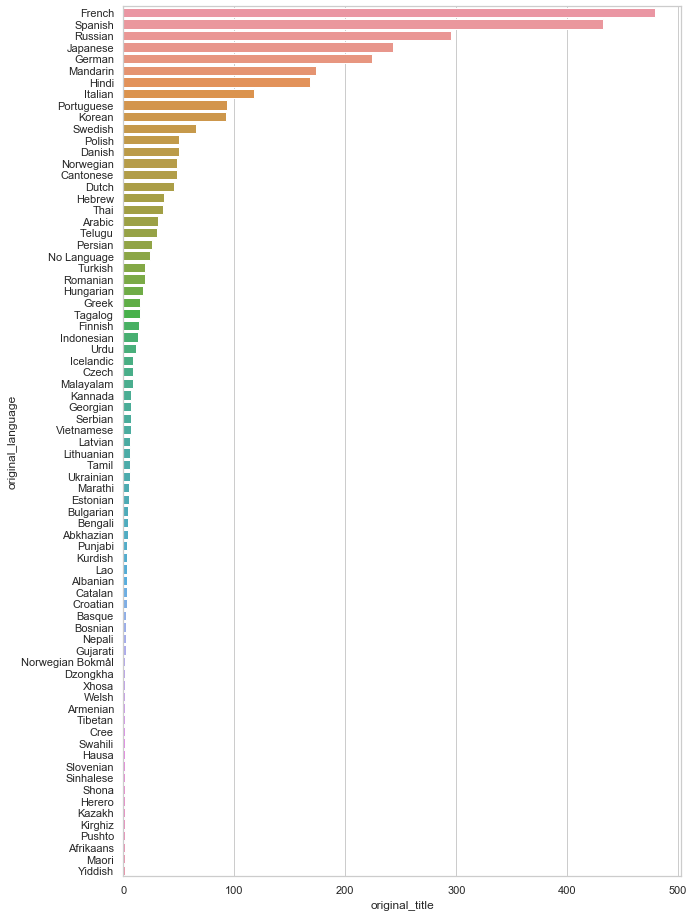

In [124]:
#create a barplot in seaborn
#set plt figure object
#set style
#call sns barplot

fig, g = plt.subplots(figsize=(10, 16))
sns.set(style="whitegrid") 

g = sns.barplot(x='original_title', y='original_language', data=tmdblangnesort)

In [68]:
#set new dataframe for 10 cols

langtop10 = tmdblangnesort.loc[:9]
langtop10

,original_language,original_title,release_date,popularity
0,French,479,479,479
1,Spanish,432,432,432
2,Russian,295,295,295
3,Japanese,243,243,243
4,German,224,224,224
5,Mandarin,174,174,174
6,Hindi,168,168,168
7,Italian,118,118,118
8,Portuguese,93,93,93
9,Korean,92,92,92


Text(0.5, 1.0, 'Top 10 Non-English Films by Language')

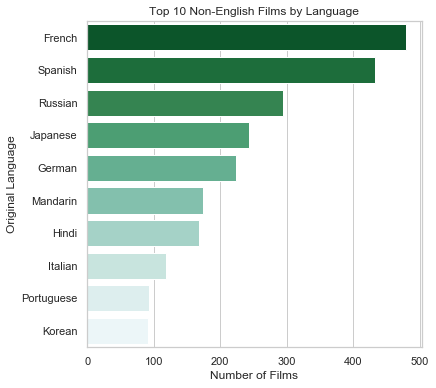

In [122]:
#create a barplot in seaborn
#set plt figure object
#set style
#call sns barplot
#set labels for x and y axis
#set title for barplot

fig, g =plt.subplots(figsize=(6, 6))
sns.set(style="whitegrid")

g = sns.barplot(x='original_title', y='original_language', data=langtop10, palette="BuGn_r")
g.set(xlabel='Number of Films', ylabel='Original Language')
g.set_title('Top 10 Non-English Films by Language')

***Findings*** Top 10 most represented languages in the dataset are French, Spanish, Russian, Japanese, German, Mandarin, Hindi, Italian, Portuguese, and Korean.

# Top non-English Films

In [17]:
#set new dataframe from grouped languages
#set new dataframe by sort by value
#reset index

langcount = langne_df.groupby('original_language').count()
langcountsort = langcount.sort_values(by=['original_title'], ascending=False)
langcountsort = langcountsort.reset_index()

#set new dataframe for first 6 cols
langcountne = langcountsort.loc[1:6]
langcountne

,original_language,original_title,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
1,Spanish,10,10,10,10,10,10
2,German,5,5,5,5,5,5
3,Portuguese,4,4,4,4,4,4
4,Hindi,3,3,3,3,3,3
5,Swedish,3,3,3,3,3,3
6,Finnish,2,2,2,2,2,2


In [85]:
#set new dataframe from sort dataframe
#reset index
#set new dataframe for 10 cols

langgrosssort = langne_df.sort_values(by=['worldwide_gross'], ascending=False)
langgrosssort = langgrosssort.reset_index(drop=True)
lgstop = langgrosssort.loc[1:10] #accounting for anomaly in top which is english
lgstop

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
1,Baahubali 2: The Conclusion,Telugu,2017-04-27,30000000.00,18985794.00,263502914.00,233502914.00
2,No se Aceptan Devoluciones,Spanish,2013-08-30,5000000.00,44467206.00,100486616.00,95486616.00
3,Snowpiercer,Korean,2014-06-27,40000000.00,4563029.00,88069880.00,48069880.00
4,Das Boot,German,1982-02-10,12000000.00,11487676.00,84970337.00,72970337.00
5,Konferenz der Tiere,German,2010-10-07,30000000.00,0.00,53048539.00,23048539.00
6,El secreto de sus ojos,Spanish,2010-04-16,3500000.00,6391436.00,40527719.00,37027719.00
7,Amour,French,2012-12-19,9700000.00,6738954.00,36787044.00,27087044.00
8,Metegol,Spanish,2015-08-14,22000000.00,0.00,34061097.00,12061097.00
9,Superstar,French,2012-09-09,14000000.00,30628981.00,30628981.00,16628981.00
10,La grande bellezza,Italian,2013-11-15,12000000.00,2883879.00,29549145.00,17549145.00


In [86]:
lgstop.describe() #return summary statistics for dataframe

,production_budget,domestic_gross,worldwide_gross,total_net
count,10.00,10.00,10.00,10.00
mean,17820000.00,12614695.50,76163227.20,58343227.20
std,12128094.11,14651471.23,70930804.09,67167557.61
min,3500000.00,0.00,29549145.00,12061097.00
25%,10275000.00,3303666.50,34742583.75,18923993.50
50%,13000000.00,6565195.00,46788129.00,32057381.50
75%,28000000.00,17111264.50,87294994.25,66745222.75
max,40000000.00,44467206.00,263502914.00,233502914.00


In [87]:
#calculate sums of columns

lgstop.loc[:, ['production_budget', 'worldwide_gross', 'total_net']].sum()

production_budget   178200000.00
worldwide_gross     761632272.00
total_net           583432272.00
dtype: float64

In [59]:
langgrosssort.describe() #call first 5 rows

,production_budget,domestic_gross,worldwide_gross,total_net
count,64.00,64.00,64.00,64.00
mean,12876562.50,6163913.53,30350000.06,17473437.56
std,27033794.21,21614187.81,99640556.49,77176097.69
min,200000.00,0.00,0.00,-75978328.00
25%,1475000.00,9892.50,755741.50,-1425895.50
50%,5000000.00,532915.00,9203502.00,1297230.50
75%,13550000.00,4183494.75,22049006.50,11266454.00
max,200000000.00,166112167.00,757677748.00,557677748.00


In [65]:
#calculate sum of columns

langgrosssort.loc[:, ['production_budget', 'worldwide_gross', 'total_net']].sum()

production_budget    824100000.00
worldwide_gross     1942400004.00
total_net           1118300004.00
dtype: float64

In [81]:
tmdb_mglb_df_clean.describe() #return summary statistics of dataframe

,id,popularity,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
count,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00,1908.00
mean,192990.67,10.72,6.16,1657.41,0.09,0.45,0.03,0.07,0.30,0.12,0.10,0.02,0.03,0.07,0.01,0.24,0.13,0.27,0.01,0.16,0.04,0.11,0.14,38702249.58,48868373.85,120136598.84,10166124.28,81434349.26
std,140321.57,7.99,1.14,2631.85,0.29,0.50,0.16,0.26,0.46,0.32,0.30,0.16,0.18,0.25,0.11,0.43,0.33,0.45,0.07,0.36,0.19,0.32,0.34,52246717.32,81100786.38,223570295.58,55716282.47,184409505.69
min,62.00,0.60,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9000.00,0.00,0.00,-201941321.00,-110450242.00
25%,64139.50,5.97,5.60,77.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5000000.00,830829.00,3168816.25,-10000000.00,-1743918.75
50%,164371.50,9.52,6.20,618.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20000000.00,20256140.50,36481606.00,-785468.50,13531611.00
75%,307753.25,14.34,6.90,2036.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,50000000.00,58452849.75,126609553.25,17937046.00,77570874.75
max,566114.00,80.77,10.00,22186.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,425000000.00,760507625.00,2776345279.00,500059566.00,2351345279.00


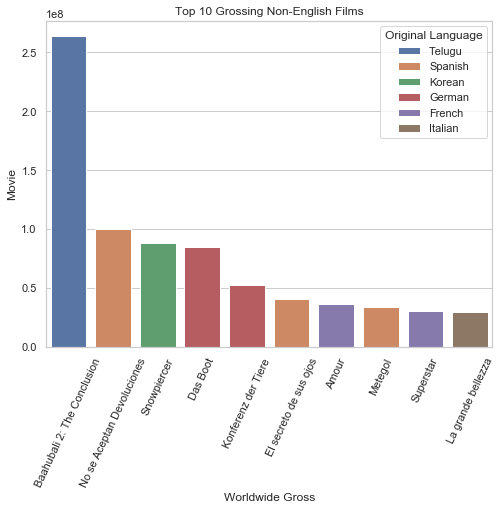

In [96]:
#create a barplot in seaborn
#set plt figure object
#set style
#call sns barplot
#set xticks rotation
#set labels for x and y axis
#set title for barplot
#set legend
#set legend title

fig, g =plt.subplots(figsize=(8, 6))
sns.set(style="whitegrid")

g = sns.barplot(x='original_title', y='worldwide_gross', hue='original_language', data=lgstop, dodge=False)
g.set_xticklabels(ax.get_xticklabels(), rotation=65)
g.set(xlabel='Worldwide Gross', ylabel='Movie')
g.set_title('Top 10 Grossing Non-English Films')
l = ax.legend()
l.set_title('Original Language')


***Findings:***  The top 10 grossing, non-English films brought in \\$762 mil worldwide, with a net revenue of \\$583 mil and \\$178 mil in production costs. <br>
The average net revenue of all non-English films in the dataset is \\$1.3 mil with an average production cost of \\$5 mil.

In [114]:
#set new dataframe from filtering out 'English' value in 'original_language' col

lange_df = lang_df[lang_df['original_language'].isin(['English'])] 
lange_df

,original_title,original_language,release_date_x,production_budget,domestic_gross,worldwide_gross,total_net
1,How to Train Your Dragon,English,2010-03-26,165000000.00,217581232.00,494870992.00,329870992.00
2,Iron Man 2,English,2010-05-07,170000000.00,312433331.00,621156389.00,451156389.00
3,Toy Story,English,1995-11-22,30000000.00,191796233.00,364545516.00,334545516.00
4,Inception,English,2010-07-16,160000000.00,292576195.00,835524642.00,675524642.00
5,Percy Jackson & the Olympians: The Lightning T...,English,2010-02-11,95000000.00,88768303.00,223050874.00,128050874.00
...,...,...,...,...,...,...,...
25905,Molly,English,2018-09-25,21000000.00,17396.00,17396.00,-20982604.00
26120,The Box,English,2018-03-04,25000000.00,15051977.00,34356760.00,9356760.00
26172,Enough,English,2018-03-22,38000000.00,39177215.00,50970660.00,12970660.00
26402,Undiscovered,English,2018-04-07,9000000.00,1069318.00,1069318.00,-7930682.00


In [118]:
lange_df.loc[:,'worldwide_gross'].sum() #calculate sum of column

227278230581.0